In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
n = 150
i = np.arange(n+1)
X1 = -0.7 + i * 0.01
X2 = 0.5 + i * 0.01

np.random.seed(42)
Y = 3.4 + 2.7 * X1 - 0.5 * X2 + np.random.uniform(-1.10, 1.10, size=len(X1))

data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

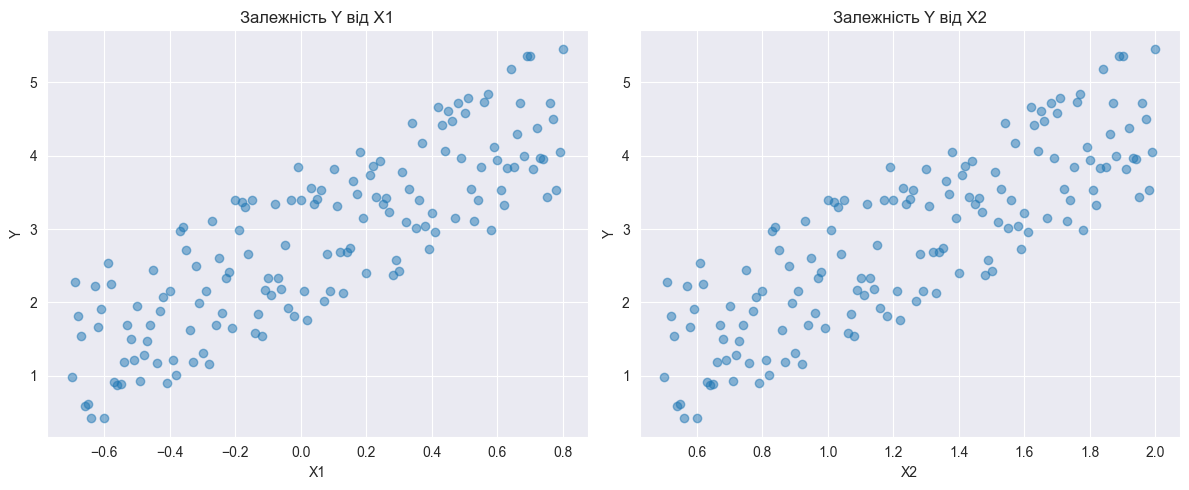

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X1, Y, alpha=0.5)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.set_title('Залежність Y від X1')

ax2.scatter(X2, Y, alpha=0.5)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.set_title('Залежність Y від X2')

plt.tight_layout()
plt.show()

In [4]:
X = data[['X1', 'X2']]
y = data['Y']

model = LinearRegression()
model.fit(X, y)

print('Коефіцієнти регресії:')
print(f'b0 (константа) = {model.intercept_:.4f}')
print(f'b1 (X1) = {model.coef_[0]:.4f}')
print(f'b2 (X2) = {model.coef_[1]:.4f}')

Коефіцієнти регресії:
b0 (константа) = 1.4009
b1 (X1) = 1.1199
b2 (X2) = 1.1199


In [5]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

correlation_matrix = data.corr()

X_with_const = np.column_stack([np.ones(len(X)), X])
mse = np.sum((y - y_pred) ** 2) / (len(y) - p - 1)
var_covar_matrix = mse * np.linalg.inv(X_with_const.T @ X_with_const)
std_errors = np.sqrt(np.diag(var_covar_matrix))

print('\nСтатистичні показники:')
print(f'R-квадрат: {r2:.4f}')
print(f'Скоригований R-квадрат: {adj_r2:.4f}')
print('\nКореляційна матриця:')


Статистичні показники:
R-квадрат: 0.6913
Скоригований R-квадрат: 0.6871

Кореляційна матриця:


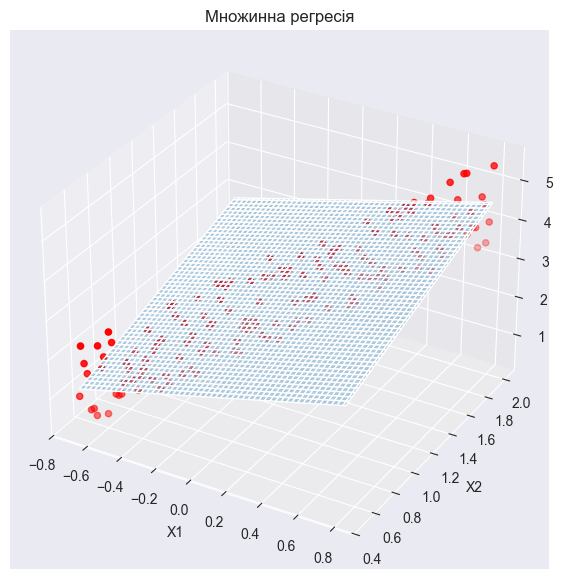

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1_grid, x2_grid = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                              np.linspace(X2.min(), X2.max(), 100))

X_grid = pd.DataFrame({
    'X1': x1_grid.ravel(),
    'X2': x2_grid.ravel()
})

y_grid = model.predict(X_grid)
y_grid = y_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3)
ax.scatter(X1, X2, Y, c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Множинна регресія')

plt.show()

In [7]:
elasticity_x1 = model.coef_[0] * X1.mean() / Y.mean()
elasticity_x2 = model.coef_[1] * X2.mean() / Y.mean()

beta_x1 = model.coef_[0] * X1.std() / Y.std()
beta_x2 = model.coef_[1] * X2.std() / Y.std()

print('\nКоефіцієнти еластичності:')
print(f'E1 = {elasticity_x1:.4f}')
print(f'E2 = {elasticity_x2:.4f}')

print('\nБета-коефіцієнти:')
print(f'β1 = {beta_x1:.4f}')
print(f'β2 = {beta_x2:.4f}')


Коефіцієнти еластичності:
E1 = 0.0196
E2 = 0.4900

Бета-коефіцієнти:
β1 = 0.4157
β2 = 0.4157
